## Part III: Extracting Data From the API

USDA's FoodData Central API documentation: https://fdc.nal.usda.gov/api-guide.html

First I will write a function that returns a list of search results from the API. Then I will use this function to get the ID numbers for the foods in my data frame. Using the ID numbers, I can then get a list of nutrients for each food from the API and add this data to my data frame. 

In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import requests
import requests_cache
import seaborn as sns
import time
import csv

In [25]:
def ndb_search(term):
    """
    Nutrition Database Search
    This function receives a search term and returns a list of search results.
    """
    
    url = 'https://api.nal.usda.gov/fdc/v1/foods/search?api_key=MyKey&query='
    
    r = requests.get(url+term)
    r = r.json()
    results = r['foods']
    
    return results

In [54]:
# use ndb_search to get the FDC ID numbers for all of the foods from my fresh foods data frame

# read csv file into a pandas data frame
fresh_df = pd.read_csv('fresh.csv')

# get list of all foods in data frame
foodlist = fresh_df['food']


id_list = []
search_titles = []

# iterate through list of foods in data frame 
for i in foodlist:
    
    # use food name as the search term, and add 'raw' to get results for raw foods
    term = i + ', raw'
    # call function that retrieves the search results from the API
    search = ndb_search(term)
    search = search[0]
    
    # retrieve FDC ID and add to list of IDs
    fdcid = search['fdcId']
    id_list.append(fdcid)
    
    # retrieve the title of the search result and add to list of titles
    title = search['description']
    search_titles.append(title)

In [58]:
# use ID and search title lists to add new columns to the data frame

fresh_df['search'] = search_titles
fresh_df['fdcId'] = id_list
fresh_df

,food,form,price_per_lb,yields,lb_per_cup,price_per_cup,type,search,fdcId
0,Apples,Fresh,1.615534,0.900000,0.242508,0.435312,fruit,"Apple, raw",1102644
1,Apricots,Fresh,3.087138,0.930000,0.363763,1.207511,fruit,"Apricots, raw",171697
2,Bananas,Fresh,0.549417,0.640000,0.330693,0.283889,fruit,"Bananas, raw",173944
3,Blueberries,Fresh,4.391108,0.950000,0.319670,1.477586,fruit,"Blueberries, raw",1102702
4,Cantaloupe,Fresh,0.520794,0.510000,0.374786,0.382718,fruit,"Cantaloupe, raw",1102655
5,Cherries,Fresh,3.213068,0.920000,0.341717,1.193433,fruit,"Cherries, raw",1102660
6,Grapefruit,Fresh,1.009797,0.490000,0.462971,0.954095,fruit,"Grapefruit, raw",1102591
7,Grapes,Fresh,2.235873,0.960000,0.330693,0.770196,fruit,"Grapes, raw",1102665
8,Honeydew melon,Fresh,0.825991,0.460000,0.374786,0.672978,fruit,"Honeydew melon, raw",1102669
9,Kiwi,Fresh,2.181328,0.760000,0.385809,1.107337,fruit,"Kiwi fruit, raw",1102667


For most searches, the first search result retrieved the desired ID number. However, some of the first search results are not ideal for this data frame; for example, the first search result using the term "Potatoes, raw" retrieved the ID for "Potatoes, raw, skin." For items like these I will use more specific search terms to retrieve the IDs that I am looking for. 

In [73]:
# get more accurate ID numbers for specific items
# store the more accurate ID numbers into the data frame

results = ndb_search('Potatoes, flesh and skin, raw')
results = results[0]
fresh_df.iloc[46, 7]  = 'Potatoes, flesh and skin, raw'
fresh_df.iloc[46, 8] = results['fdcId']

results = ndb_search('Corn, sweet, yellow, raw')
results = results[0]
fresh_df.iloc[35, 7] = 'Corn, sweet, yellow, raw'
fresh_df.iloc[35, 8] = results['fdcId']

results = ndb_search('Peppers, bell, green, raw')
results = results[0]
fresh_df.iloc[38, 7] = 'Peppers, bell, green, raw'
fresh_df.iloc[38, 8] = results['fdcId']

results = ndb_search('Peppers, bell, red, raw')
results = results[0]
fresh_df.iloc[48, 7] = 'Peppers, bell, red, raw'
fresh_df.iloc[48, 8] = results['fdcId']

results = ndb_search('Sweet potato, raw, unprepared (Includes foods for USDA''s Food Distribution Program)')
results = results[0]
fresh_df.iloc[51, 7] = 'Sweet potato, raw, unprepared'
fresh_df.iloc[51, 8] = results['fdcId']

In [630]:
def ndb_report(fdcId):
    """
    This function accepts a food item's FDC ID number and returns a list of nutrients for the food.
    """
    
    # convert ID number to string
    fdcId = str(fdcId)
    
    headers = {
       'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:101.0) Gecko/20100101 Firefox/101.0',
    }
    
    # use ID number in the URL to get the URL for the corresponding food item
    url = 'https://api.nal.usda.gov/fdc/v1/food/' + fdcId + '?api_key=MyKey'
    r = requests.get(url, headers=headers)
    r = r.json()
    
    # get the list of food nutrients
    report = r['foodNutrients']
    
    return report

I will use my ndb_report() function to extract nutrient data for the foods in my data frame:

In [292]:
# initialize lists that will store the amounts of each nutrient for each food item
sugars = []
fibers = []
irons = []
vit_c = []
proteins = []
calories = []

# iterate through the list of food central IDs
for i in range(0, len(id_list)):
    
    # call ndb_report() to get list of nutrients for the current ID number
    idnum = id_list[i]
    report = ndb_report(idnum)
    
    # iterate through the list of nutrients and 
    # add the nutrient data for sugars, fiber, iron, vitamin C, protein, and kilocalories to lists
    for j in range(len(report)):
        nutrient = report[j]
        name = nutrient['nutrient']['name']
        if name == 'Sugars, total including NLEA':
            sugar = nutrient['amount']
            sugars.append(sugar)
        if name == 'Fiber, total dietary':
            fiber = nutrient['amount']
            fibers.append(fiber)
        if name == 'Iron, Fe':
            iron = nutrient['amount']
            irons.append(iron)
        if name == 'Vitamin C, total ascorbic acid':
            vitc = nutrient['amount']
            vit_c.append(vitc)
        if name == 'Protein':
            protein = nutrient['amount']
            proteins.append(protein)
        if name == 'Energy':
            kcal = nutrient['amount']
            calories.append(kcal)
    # wait 1 second before making another request to the API
    time.sleep(1)

In [ ]:
# add nutrition columns to the data frame

fresh_df['sugar'] = sugars
fresh_df['fiber'] = fibers
fresh_df['iron'] = irons
fresh_df['protein'] = proteins
fresh_df['vitamin_C'] = vit_c
fresh_df['kilocalories'] = calories

## Part IIII: Data Analysis

### Which foods provide the best combination of price, yield, and nutrition?

To answer this question I will calculate the Z-scores for the nutrient columns, and then for each food, calculate the sum of the food's corresponding nutrient Z-scores to get a nutrition score. I will then subract each food's price/yield from it's nutrition score to get a final score that represents it's combination of price, yield, and nutrition. An item with a low price and high nutrition score will get a high final score, while an item with a high price and low nutrition score will get a low final score. 

In [658]:
from scipy.stats import zscore

# divide price by yield
fresh_df['price/yield'] = fresh_df['price_per_lb'] / fresh_df['yields']

# calculate z scores
fresh_df['fiber_z'] = zscore(fresh_df['fiber'])
fresh_df['iron_z'] = zscore(fresh_df['iron'])
fresh_df['protein_z'] = zscore(fresh_df['protein'])
fresh_df['vitC_z'] = zscore(fresh_df['vitamin_C'])
fresh_df['price_z'] = zscore(fresh_df['price/yield'])

fresh_df['nutrition_score'] = fresh_df['fiber_z'] + fresh_df['iron_z'] + fresh_df['protein_z'] + fresh_df['vitC_z'] 
fresh_df['total_score'] = fresh_df['nutrition_score'] - fresh_df['price_z']

Text(0.5, 1.0, 'Scores for Produce Items')

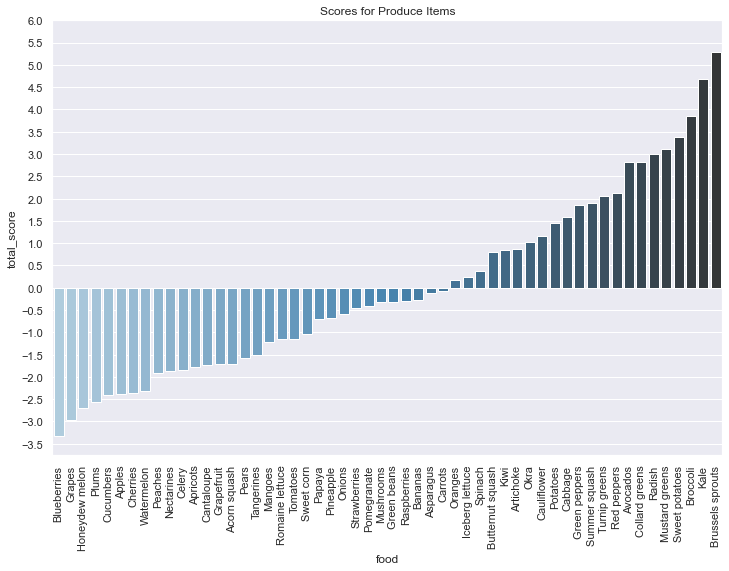

In [660]:
# create a bar chart to see scores for each food

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.barplot(data=fresh_df, x='food', y='total_score', palette='Blues_d', order=fresh_df.sort_values('total_score').food)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticks(np.arange(-3.5, 6.5, .5))
ax.set_title('Scores for Produce Items')

**Brussel sprouts**, **Kale**, **Broccoli**, and **Sweet Potatoes** provide the best combination of price and the selected nutrient amounts, in comparison to all of the other foods in our data frame. 

In order to see which foods have the best combination of calories, price, and yield, I will use a similar process as the one above, but using just calories instead of the other nutrients.

Text(0.5, 1.0, 'Best Combination of Calories and Price for Produce Items')

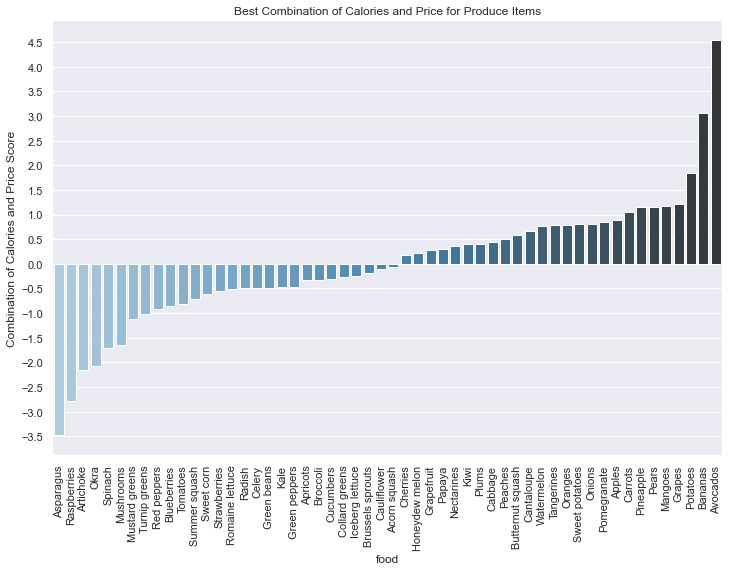

In [670]:
# calculate zscores for kilocalories column and then subtract the price Z-scores from the kilocalories Z-scores
fresh_df['kcal_z'] = zscore(fresh_df['kilocalories'])
fresh_df['cals_price'] = fresh_df['kcal_z'] - fresh_df['price_z']

# create a bar chart
sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.barplot(data=fresh_df, x='food', y='cals_price', palette='Blues_d', order=fresh_df.sort_values('cals_price').food)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticks(np.arange(-3.5, 5, .5))
ax.set_ylabel('Combination of Calories and Price Score')
ax.set_title('Best Combination of Calories and Price for Produce Items')

**Avocados**, **Bananas**, and **Potatoes** have a high amount of calories for their prices. 